# 📊 Crime Rate Prediction Model  
## 🔍 Using K-Nearest Neighbours (KNN)

---

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
file_path = "/Users/harshbhalwar/Documents/crime_dataset_india.csv"
df = pd.read_csv(file_path)

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


(None,
    Report Number   Date Reported Date of Occurrence Time of Occurrence  \
 0              1   02/01/20 0:00      01/01/20 0:00      01/01/20 1:11   
 1              2  01/01/20 19:00      01/01/20 1:00      01/01/20 6:26   
 2              3   02/01/20 5:00      01/01/20 2:00     01/01/20 14:30   
 3              4   01/01/20 5:00      01/01/20 3:00     01/01/20 14:46   
 4              5  01/01/20 21:00      01/01/20 4:00     01/01/20 16:51   
 
         City  Crime Code Crime Description  Victim Age Victim Gender  \
 0  Ahmedabad         576    IDENTITY THEFT          16             M   
 1    Chennai         128          HOMICIDE          37             M   
 2   Ludhiana         271        KIDNAPPING          48             F   
 3       Pune         170          BURGLARY          49             F   
 4       Pune         421         VANDALISM          30             F   
 
     Weapon Used   Crime Domain  Police Deployed Case Closed Date Case Closed  
 0  Blunt Object  Vio

In [29]:
unique_crimes = df["Crime Description"].unique()

no_of_unique_crimes = len(unique_crimes)
print(unique_crimes)
print(no_of_unique_crimes)

['IDENTITY THEFT' 'HOMICIDE' 'KIDNAPPING' 'BURGLARY' 'VANDALISM' 'ASSAULT'
 'VEHICLE - STOLEN' 'COUNTERFEITING' 'EXTORTION' 'PUBLIC INTOXICATION'
 'FRAUD' 'SEXUAL ASSAULT' 'DRUG OFFENSE' 'ARSON' 'CYBERCRIME'
 'TRAFFIC VIOLATION' 'SHOPLIFTING' 'ILLEGAL POSSESSION' 'FIREARM OFFENSE'
 'ROBBERY' 'DOMESTIC VIOLENCE']
21


In [30]:
detailed_crime_mapping = {
    "HOMICIDE": ["HOMICIDE"],
    "KIDNAPPING": ["KIDNAPPING"],
    "IDENTITY THEFT": ["IDENTITY THEFT"],
    "BURGLARY": ["BURGLARY"],
    "VANDALISM": ["VANDALISM"],
    "ASSAULT": ["ASSAULT", "SEXUAL ASSAULT"],
    "VEHICLE THEFT": ["VEHICLE - STOLEN"],
    "COUNTERFEITING": ["COUNTERFEITING"],
    "EXTORTION": ["EXTORTION"],
    "PUBLIC DISORDER": ["PUBLIC INTOXICATION"],
    "FRAUD": ["FRAUD"],
    "DRUG OFFENSE": ["DRUG OFFENSE"],
    "ARSON": ["ARSON"],
    "CYBERCRIME": ["CYBERCRIME"],
    "TRAFFIC VIOLATION": ["TRAFFIC VIOLATION"],
    "SHOPLIFTING": ["SHOPLIFTING"],
    "ILLEGAL POSSESSION": ["ILLEGAL POSSESSION"],
    "FIREARM OFFENSE": ["FIREARM OFFENSE"],
    "ROBBERY": ["ROBBERY"]
}

def categorize_crimes(description):
    for category, keywords in detailed_crime_mapping.items():
        if description in keywords:
            return category
    return 'OTHER'

df["Crime Category"] = df["Crime Description"].apply(categorize_crimes)

df[["City", "Crime Description", "Crime Category"]].head(20)

,City,Crime Description,Crime Category
0,Ahmedabad,IDENTITY THEFT,IDENTITY THEFT
1,Chennai,HOMICIDE,HOMICIDE
2,Ludhiana,KIDNAPPING,KIDNAPPING
3,Pune,BURGLARY,BURGLARY
4,Pune,VANDALISM,VANDALISM
5,Delhi,ASSAULT,ASSAULT
6,Chennai,VEHICLE - STOLEN,VEHICLE THEFT
7,Chennai,COUNTERFEITING,COUNTERFEITING
8,Mumbai,EXTORTION,EXTORTION
9,Chennai,PUBLIC INTOXICATION,PUBLIC DISORDER


In [31]:
crime_pivot  = df.pivot_table(index="City", columns="Crime Category", aggfunc="size", fill_value=0)

crime_pivot.reset_index(inplace=True)

crime_pivot.head(10)

Crime Category,City,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DRUG OFFENSE,EXTORTION,FIREARM OFFENSE,FRAUD,...,IDENTITY THEFT,ILLEGAL POSSESSION,KIDNAPPING,OTHER,PUBLIC DISORDER,ROBBERY,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE THEFT
0,Agra,43,77,32,40,32,31,39,40,33,...,37,30,38,38,43,40,37,33,33,36
1,Ahmedabad,80,205,94,84,87,82,83,88,85,...,83,89,86,102,82,94,85,81,76,75
2,Bangalore,154,331,187,176,155,168,188,164,152,...,177,176,168,171,198,167,167,166,179,162
3,Bhopal,38,71,23,29,31,30,26,28,38,...,35,33,42,34,41,28,35,31,33,29
4,Chennai,138,227,134,115,117,103,122,122,114,...,128,107,135,97,107,108,116,110,124,131
5,Delhi,227,485,254,254,286,278,246,291,281,...,272,250,260,275,246,280,244,198,256,247
6,Faridabad,19,39,11,14,13,12,13,17,11,...,25,18,21,20,18,18,16,18,22,14
7,Ghaziabad,35,63,37,32,27,40,32,24,34,...,33,33,36,40,40,41,27,42,31,29
8,Hyderabad,152,250,140,136,139,134,124,138,126,...,159,142,126,143,143,138,120,135,131,165
9,Indore,28,69,31,32,34,34,39,45,33,...,34,29,30,33,26,41,30,32,28,37


In [32]:
city_population = {
    'Agra' : 1585704,
    'Ahmedabad'  : 5570585, 
    'Bangalore' :8443675 , 
    'Bhopal' : 1798218, 
    'Chennai' : 7088000, 
    'Delhi' : 16787941, 
    'Faridabad' :1404653 , 
    'Ghaziabad' : 2358525, 
    'Hyderabad' :6809970 , 
    'Indore' : 1994397, 
    'Jaipur' : 3046163, 
    'Kalyan' : 1247327, 
    'Kanpur' : 2767031, 
    'Kolkata' : 4496694, 
    'Lucknow' : 2817105, 
    'Ludhiana' :1618879 , 
    'Meerut' : 1305429, 
    'Mumbai' : 12442373, 
    'Nagpur' : 2405665, 
    'Nashik' : 1486053, 
    'Patna' : 1684222, 
    'Pune' : 3124458, 
    'Rajkot' : 1390640,
    'Srinagar' : 1180570, 
    'Surat' : 4467797, 
    'Thane' : 1841488, 
    'Varanasi' :1198491 , 
    'Vasai' : 1958000, 
    'Visakhapatnam' :1728128 
}

city_unemployment_rate = {
    'Agra': 5.5,
    'Ahmedabad': 6.4,
    'Bangalore': 1.8,
    'Bhopal': 0.1,
    'Chennai': 3.0, 
    'Delhi': 2.1,
    'Faridabad': 3.0,
    'Ghaziabad': 3.0,
    'Hyderabad': 7.1,
    'Indore': 0.8,
    'Jaipur': 4.7,
    'Kalyan': 3.0,
    'Kanpur': 7.7,
    'Kolkata': 4.14,
    'Lucknow': 3.0,
    'Ludhiana': 6.3,
    'Meerut': 3.9,
    'Mumbai': 3.0,
    'Nagpur': 3.0,
    'Nashik': 3.0,
    'Patna': 13.2,
    'Pune': 3.0,
    'Rajkot': 3.0,
    'Srinagar': 3.0,
    'Surat': 0.6,
    'Thane': 3.0,
    'Varanasi': 3.0,
    'Vasai': 3.0,
    'Visakhapatnam': 3.0
}

city_literacy_rate = {
    'Agra' : 73.11,
    'Ahmedabad'  : 89.62, 
    'Bangalore' : 88.71, 
    'Bhopal' :85.24 , 
    'Chennai' : 90.33, 
    'Delhi' : 86.21, 
    'Faridabad' : 83.04, 
    'Ghaziabad' : 78.07, 
    'Hyderabad' : 83.26, 
    'Indore' : 82.32, 
    'Jaipur' : 84.34, 
    'Kalyan' : 89.41, 
    'Kanpur' : 79.65, 
    'Kolkata' : 87.14, 
    'Lucknow' : 84.72, 
    'Ludhiana' : 85.38, 
    'Meerut' : 76.28, 
    'Mumbai' : 90.28, 
    'Nagpur' : 91.92, 
    'Nashik' : 89.85, 
    'Patna' : 83.37, 
    'Pune' : 91.61, 
    'Rajkot' : 86.11, 
    'Srinagar' : 70.98, 
    'Surat' : 86.65, 
    'Thane' : 89.41, 
    'Varanasi' : 80.12, 
    'Vasai' : 85.00, 
    'Visakhapatnam' :81.79 
}

crime_pivot['Population'] = crime_pivot['City'].map(city_population)
crime_pivot['Unemployment Rate'] = crime_pivot['City'].map(city_unemployment_rate)
crime_pivot['Literacy Rate'] = crime_pivot['City'].map(city_literacy_rate)

In [33]:
crime_pivot.head(10)

Crime Category,City,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DRUG OFFENSE,EXTORTION,FIREARM OFFENSE,FRAUD,...,OTHER,PUBLIC DISORDER,ROBBERY,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE THEFT,Population,Unemployment Rate,Literacy Rate
0,Agra,43,77,32,40,32,31,39,40,33,...,38,43,40,37,33,33,36,1585704,5.5,73.11
1,Ahmedabad,80,205,94,84,87,82,83,88,85,...,102,82,94,85,81,76,75,5570585,6.4,89.62
2,Bangalore,154,331,187,176,155,168,188,164,152,...,171,198,167,167,166,179,162,8443675,1.8,88.71
3,Bhopal,38,71,23,29,31,30,26,28,38,...,34,41,28,35,31,33,29,1798218,0.1,85.24
4,Chennai,138,227,134,115,117,103,122,122,114,...,97,107,108,116,110,124,131,7088000,3.0,90.33
5,Delhi,227,485,254,254,286,278,246,291,281,...,275,246,280,244,198,256,247,16787941,2.1,86.21
6,Faridabad,19,39,11,14,13,12,13,17,11,...,20,18,18,16,18,22,14,1404653,3.0,83.04
7,Ghaziabad,35,63,37,32,27,40,32,24,34,...,40,40,41,27,42,31,29,2358525,3.0,78.07
8,Hyderabad,152,250,140,136,139,134,124,138,126,...,143,143,138,120,135,131,165,6809970,7.1,83.26
9,Indore,28,69,31,32,34,34,39,45,33,...,33,26,41,30,32,28,37,1994397,0.8,82.32


In [34]:
# Calculate Crime Rate

crime_columns = ['ARSON', 'ASSAULT', 'BURGLARY', 'COUNTERFEITING', 'CYBERCRIME',
                 'DRUG OFFENSE', 'EXTORTION', 'FIREARM OFFENSE', 'FRAUD', 'OTHER',
                 'PUBLIC DISORDER', 'ROBBERY', 'SHOPLIFTING', 'TRAFFIC VIOLATION',
                 'VANDALISM', 'VEHICLE THEFT']

crime_pivot['Total Crimes'] = crime_pivot[crime_columns].sum(axis=1)
crime_pivot['Crime Rate'] = (crime_pivot['Total Crimes'] / crime_pivot['Population']) * 100000

In [35]:
crime_pivot.head()

Crime Category,City,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DRUG OFFENSE,EXTORTION,FIREARM OFFENSE,FRAUD,...,ROBBERY,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE THEFT,Population,Unemployment Rate,Literacy Rate,Total Crimes,Crime Rate
0,Agra,43,77,32,40,32,31,39,40,33,...,40,37,33,33,36,1585704,5.5,73.11,627,39.540797
1,Ahmedabad,80,205,94,84,87,82,83,88,85,...,94,85,81,76,75,5570585,6.4,89.62,1483,26.621980
2,Bangalore,154,331,187,176,155,168,188,164,152,...,167,167,166,179,162,8443675,1.8,88.71,2885,34.167587
3,Bhopal,38,71,23,29,31,30,26,28,38,...,28,35,31,33,29,1798218,0.1,85.24,545,30.307782
4,Chennai,138,227,134,115,117,103,122,122,114,...,108,116,110,124,131,7088000,3.0,90.33,1985,28.005079


In [36]:
from sklearn.preprocessing import OneHotEncoder

features = ['City', 'Population', 'Unemployment Rate', 'Literacy Rate']
target = ['Crime Rate']

X = crime_pivot[features]
y = crime_pivot[target]


# Perform One-Hot Encoding
encoder1 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_city = encoder1.fit_transform(X[['City']])
city_columns1 = encoder1.get_feature_names_out(['City'])

print(X.index)


RangeIndex(start=0, stop=29, step=1)


In [37]:
# 3. Create DataFrame for encoded city and concatenate with numeric features

df_encoded_city = pd.DataFrame(encoded_city, columns=city_columns1, index=X.index)
X_numeric = X.drop("City", axis=1)
X_final = pd.concat([df_encoded_city, X_numeric], axis=1)

# print(df_encoded_city)
# print(X_numeric)
X_final.head()

,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,City_Hyderabad,City_Indore,...,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Varanasi,City_Vasai,City_Visakhapatnam,Population,Unemployment Rate,Literacy Rate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585704,5.5,73.11
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5570585,6.4,89.62
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8443675,1.8,88.71
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1798218,0.1,85.24
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7088000,3.0,90.33


In [38]:
import joblib

joblib.dump(X_final.columns, "knnFeatures.pkl")

['knnFeatures.pkl']

In [39]:
from sklearn.model_selection import train_test_split

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

# 5. Standardize the features
scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

# 5. Initialize and fit the KNN regressor
knn = KNeighborsRegressor(n_neighbors=3) 
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score

# 6. Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# 7. Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE): ", mse)
print("R2 score: ", r2)

Mean Squared Error (MSE):  180.3699159164514
R2 score:  -0.13072684921461653


250.62434494057518
194.9666454000021
180.3699159164514
194.33917655553998
206.45684437157578


180.10909450138854
180.4083761259746
165.29337051397394
161.2463246628994
157.8964757111247
151.21657137488896
151.51981049676604
163.12577179212417
157.38998822700603
155.67992233360536
156.1594486158342
158.53036778903234
160.70133654467202
160.1164093189177
160.4898153426559
160.99972284877822


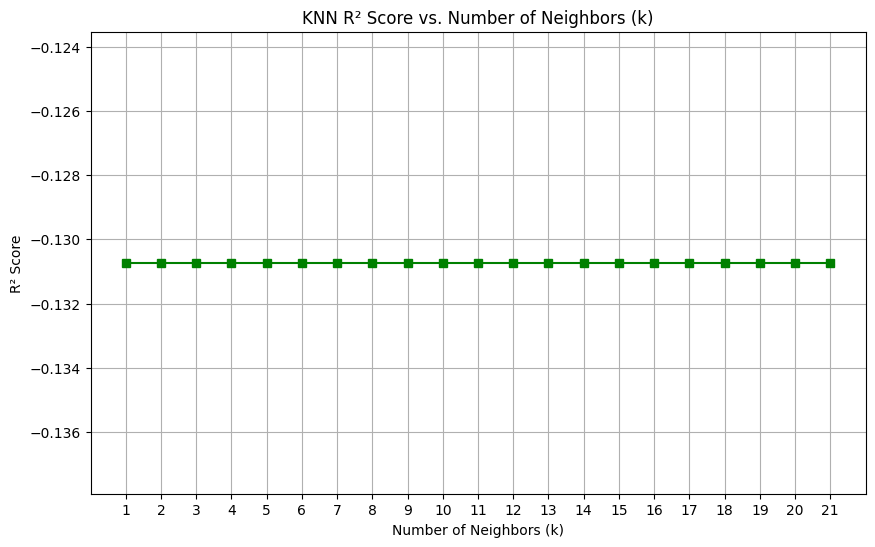

In [43]:
k_values = list(range(1, len(X_train) + 1))  # Ensure k is <= number of training samples
r2_scores = []

for k in k_values:
    knn1 = KNeighborsRegressor(n_neighbors=k)
    knn1.fit(X_train_scaled, y_train)
    y_predd = knn1.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_predd)
    score = r2_score(y_test, y_pred)
    print(mse)
    r2_scores.append(score)
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='s', linestyle='-', color='g')
plt.title('KNN R² Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [44]:
# Create Base model
knn = KNeighborsRegressor()

# Define hyperparameter grid
param_grid = [
    {
        'n_neighbors': list(range(1, 31)),
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski'],
        'p': [1, 2]
    },
    {
        'n_neighbors': list(range(1, 31)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'chebyshev']
        # No 'p' here
    }
]


In [45]:
from sklearn.model_selection import GridSearchCV
# Create Grid Search CV Object

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1, verbose=2)

In [46]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END metric=mi

/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
 

[CV] END metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=1, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=2, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=22, p=2, weights=distance; tota

/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
 


[CV] END .metric=euclidean, n_neighbors=30, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=30, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=manhatta

/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
 

[CV] END ..metric=chebyshev, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ..metric=chebyshev, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END .metric=chebyshev, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END .metric=chebyshev, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END .metric=chebyshev, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END .metric=chebyshev, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END .metric=chebyshev, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ..metric=chebyshev, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=chebyshev, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=chebyshev, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=chebyshev, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=chebyshev, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END .metric=chebyshev, 

/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harshbhalwar/Documents/python/virtual/myenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid=[{'metric': ['minkowski'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'p': [1, 2], 'weights': ['uniform', 'distance']},
                         {'metric': ['euclidean', 'manhattan', 'chebyshev'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform', 'distance']}],
             scoring='neg_mean_squared_error', verbose=2)

In [47]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Use best estimator
best_knn = grid_search.best_estimator_

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Score (Negative MSE): -47.46414478541228


In [48]:
import joblib

joblib.dump(best_knn, "knnModel.pkl")

['knnModel.pkl']

In [49]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
y_pred1 = best_knn.predict(X_test_scaled)
print(y_pred1)
joblib.dump(y_pred1, "knn_prediction")

mse = mean_squared_error(y_test, y_pred1)
r2Score = r2_score(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
rmse = root_mean_squared_error(y_test, y_pred1)
print("Test MSE:", mse)
print("R2 Score", r2Score)
print("Mean Absolute Error", mae)
print("Root MSE", rmse)


[[33.35111312]
 [25.69217288]
 [32.09124535]
 [27.38136522]
 [38.27890314]
 [30.1321768 ]
 [27.97830935]
 [29.39917366]]
Test MSE: 181.5824364851589
R2 Score -0.13832805895791767
Mean Absolute Error 9.291257727977017
Root MSE 13.475252742904635


In [50]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_pred1, y_test))



9.291257727977017
